In [20]:
import os
import datetime
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import urllib.parse
import matplotlib.pyplot as plt

load_dotenv()
POSTGRES_USERNAME = os.environ.get('JDB_USER')
POSTGRES_PASSWORD = os.environ.get('JDB_PASSWORD')
POSTGRES_ADDRESS = os.environ.get('JDB_HOST')
POSTGRES_PORT = 5432
POSTGRES_DBNAME = os.environ.get('JDB_NAME')
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres_str)

In [21]:
now = datetime.datetime.now().strftime("%m-%d-%Y")
stays = pd.read_sql_query('select * from stays_summarized where end_date is null;', cnx)
stays 

,defendant_id,name,gender,race,start_date,end_date,days,rank,is_pretrial,is_violent,is_dwi,not_primary_custodian,is_violation,flag,use_flag
0,88621,"HOPKINS, MARCO BRUCE",M,B,2022-07-02,None,1.0,4,1,1,0,0,0,0,1
1,88850,"WALLACE, ELIZABETH HOPE",F,W,2022-07-02,None,1.0,6,1,0,0,0,0,0,1
2,71076,"BAUER, SEAN AARON",M,W,2022-05-25,None,39.0,6,1,0,1,0,0,0,1
3,86999,"YASKIEWICZ, JASON ANDREW",M,W,2022-06-28,None,5.0,4,1,1,0,0,0,0,1
4,69542,"SHERLIN, KENNETH DEWAYNE",M,W,2022-05-21,None,43.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,88858,"WEBSTER, CHARLES WILLIAM",M,W,2022-07-02,None,1.0,0,1,0,0,0,1,0,1
468,7925,"CHESTER, JOHN TYLER FRANKLIN",M,W,2022-01-03,None,181.0,11,1,1,0,0,0,1,0
469,80611,"SIBERT, DEARIAN JONTESE",M,B,2022-06-14,None,19.0,0,0,0,0,0,0,1,1
470,8161,"PENLEY, BOBBY LEE",M,W,2022-01-03,None,181.0,13,1,1,0,0,0,0,0


In [22]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
#y['Percent'] = 100*x/464
y

,
Week or less,78
8-30 days,105
31-90 days,123
Over 90 days,166


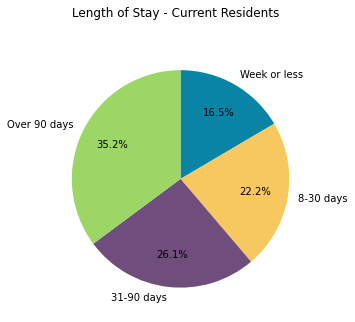

In [23]:
colors = ['#0a84a5', '#f6c85f', '#6f4d7c', '#9cd766', '#ca472f', '#ff9f56', '#8cddd0', ]

y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Length of Stay - Current Residents", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/all-current-residents-length-of-stay.png', bbox_inches='tight')

In [5]:
stays = pd.read_sql_query('select * from stays_summarized where end_date is null and is_pretrial = 1 and not_primary_custodian = 0;', cnx)
stays

,defendant_id,name,gender,race,start_date,end_date,days,rank,is_pretrial,is_violent,is_dwi,not_primary_custodian,is_violation,flag,use_flag
0,8055,"JEFFRIES, DARRYL LYNDON III",M,B,2022-01-03,None,179.0,14,1,1,0,0,0,1,0
1,8176,"RAINES, JESSE LEE",M,B,2022-01-03,None,179.0,14,1,1,0,0,1,1,0
2,8271,"WILLIAMS, BLAKE CAMERON",M,W,2022-01-03,None,179.0,14,1,1,0,0,1,1,0
3,9601,"BOYD, DWIGHT ODELL",M,W,2022-01-07,None,175.0,6,1,0,0,0,0,0,1
4,9995,"WROTEN, RICHIE DION",M,B,2022-01-07,None,175.0,5,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,87763,"MILLS, ANTONIO",M,B,2022-06-30,None,1.0,0,1,0,0,0,1,0,1
359,87780,"OLSON, CHRISTOPHER DEWAYNE",M,W,2022-06-30,None,1.0,0,1,0,0,0,1,0,1
360,87792,"PARTON, HANNAH JEANETTE",F,W,2022-06-30,None,1.0,0,1,0,0,0,1,0,1
361,87811,"PROSPERE, ASHLYN KELLY",F,W,2022-06-30,None,1.0,2,1,1,0,0,0,0,1


In [6]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
y

,
Week or less,51
8-30 days,89
31-90 days,106
Over 90 days,117


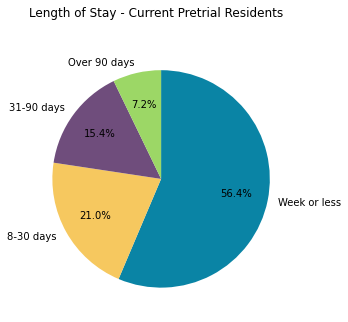

In [17]:
y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Length of Stay - Current Pretrial Residents", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-current-residents-length-of-stay.png', bbox_inches='tight')

In [12]:
stays = pd.read_sql_query('select * from stays_summarized where is_pretrial = 1 and not_primary_custodian = 0;', cnx)
stays

,defendant_id,name,gender,race,start_date,end_date,days,rank,is_pretrial,is_violent,is_dwi,not_primary_custodian,is_violation,flag,use_flag
0,35387,"CAMERON, STEFAN MIKEL",M,W,2022-03-05,2022-04-14,41.0,11,1,0,0,0,0,0,1
1,35409,"COOLEY, SUNNY MARIE",F,W,2022-03-05,2022-05-18,75.0,11,1,0,0,0,0,0,1
2,35442,"EDWARDS, MICHAEL EUGENE",M,W,2022-03-05,2022-03-08,4.0,3,1,0,0,0,0,0,1
3,8055,"JEFFRIES, DARRYL LYNDON III",M,B,2022-01-03,None,179.0,14,1,1,0,0,0,1,0
4,8176,"RAINES, JESSE LEE",M,B,2022-01-03,None,179.0,14,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,85451,"MCMAHAN, JONATHAN ANDREW",M,W,2022-06-25,2022-06-29,5.0,11,1,0,0,0,1,0,1
2406,87297,"MICHAELS, MASON NATHANIEL",M,W,2022-06-29,2022-06-29,1.0,5,1,0,0,0,0,0,1
2407,87338,"PITTS, ANTHONY KEITH JR",M,B,2022-06-29,2022-06-29,1.0,1,1,0,0,0,0,0,1
2408,82019,"WAYCASTER, CHEYENNE NICOLE",F,W,2022-06-17,2022-06-29,13.0,0,1,0,0,0,0,1,1


In [13]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
y

,
Week or less,1359
8-30 days,506
31-90 days,372
Over 90 days,173


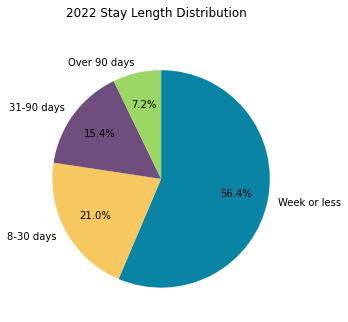

In [19]:
y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="2022 Stay Length Distribution", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-2022-residents-length-of-stay.png', bbox_inches='tight')